In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/major_project_endsem/refined_dataset.csv')

In [ ]:
df.head()

,Formula,Dosef,Hform,Natoms,Mass,Energy,Smax,Fmax,Volume,Gap_wo_soc,Bandgap
0,Al4Se6,0.0,-0.833,10,581.752,-44.175,0.0,0.007,808.565,1.529,1.524
1,Co2Se3,0.0,-0.255,5,354.779,-28.180,0.0,0.009,350.801,0.257,0.255
2,Ga4Se6,0.0,-0.523,10,752.718,-37.736,0.0,0.007,733.692,0.529,0.405
3,Rh4S6,0.0,-0.450,10,603.982,-57.557,0.0,0.007,425.002,0.553,0.440
4,Tl8Cl12,0.0,-0.864,20,2060.440,-58.691,0.0,0.009,2311.767,1.915,1.915


# cnn for bandgap prediction for 8 features

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import r2_score

# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/major_project_endsem/refined_dataset.csv')
dataset = dataset.drop('Formula', axis=1)

# Split dataset into input features (X) and target variable (y)
X = dataset.drop(['Bandgap','Gap_wo_soc'], axis=1)
y = dataset['Bandgap']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input data for CNN (add channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_split=0.2, callbacks=[reduce_lr, early_stopping])

# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
r2score = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2score)


Epoch 1/300
37/37 [==============================] - 2s 13ms/step - loss: 1.2577 - mae: 0.8277 - mse: 1.2577 - val_loss: 2.3633 - val_mae: 0.9752 - val_mse: 2.3633 - lr: 0.0010
Epoch 2/300
37/37 [==============================] - 0s 7ms/step - loss: 0.8229 - mae: 0.6633 - mse: 0.8229 - val_loss: 2.1657 - val_mae: 0.9350 - val_mse: 2.1657 - lr: 0.0010
Epoch 3/300
37/37 [==============================] - 0s 8ms/step - loss: 0.6899 - mae: 0.5924 - mse: 0.6899 - val_loss: 1.9647 - val_mae: 0.8994 - val_mse: 1.9647 - lr: 0.0010
Epoch 4/300
37/37 [==============================] - 0s 8ms/step - loss: 0.6618 - mae: 0.5857 - mse: 0.6618 - val_loss: 1.7381 - val_mae: 0.8562 - val_mse: 1.7381 - lr: 0.0010
Epoch 5/300
37/37 [==============================] - 0s 8ms/step - loss: 0.6398 - mae: 0.5756 - mse: 0.6398 - val_loss: 1.5423 - val_mae: 0.8059 - val_mse: 1.5423 - lr: 0.0010
Epoch 6/300
37/37 [==============================] - 0s 8ms/step - loss: 0.6004 - mae: 0.5409 - mse: 0.6004 - val_loss:

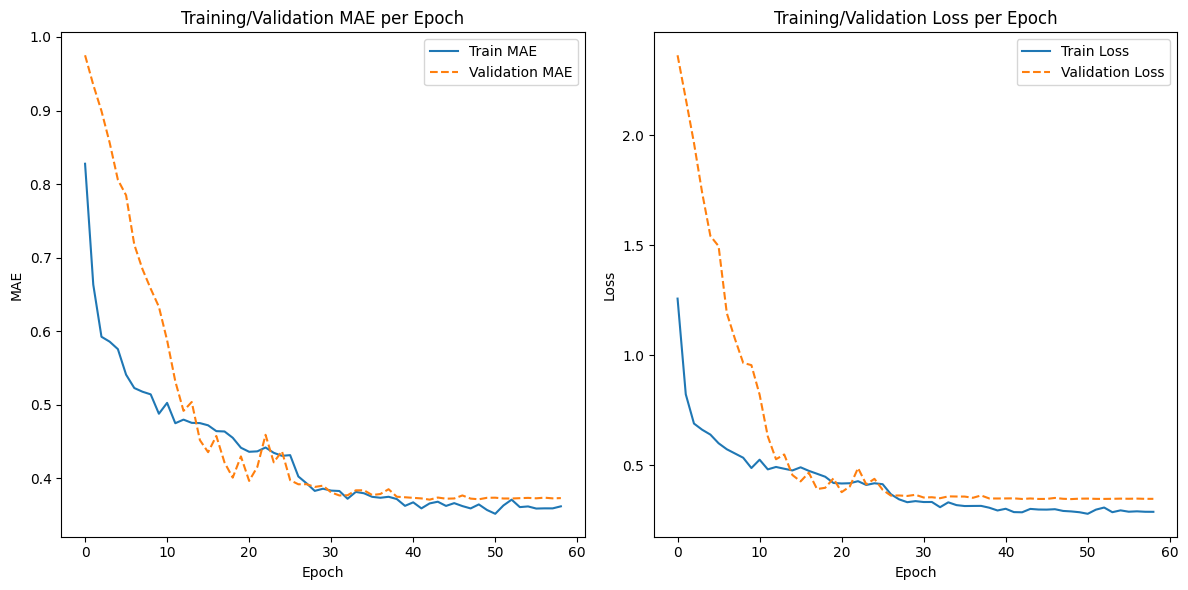

In [5]:
import matplotlib.pyplot as plt

# Create a figure with two subplots arranged horizontally
f, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Training and Validation MAE
axs[0].plot(history.history['mae'])
axs[0].plot(history.history['val_mae'], '--')
axs[0].legend(['Train MAE', 'Validation MAE'])
axs[0].set_title('Training/Validation MAE per Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('MAE')

# Plot 2: Training and Validation Loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'], '--')
axs[1].legend(['Train Loss', 'Validation Loss'])
axs[1].set_title('Training/Validation Loss per Epoch')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

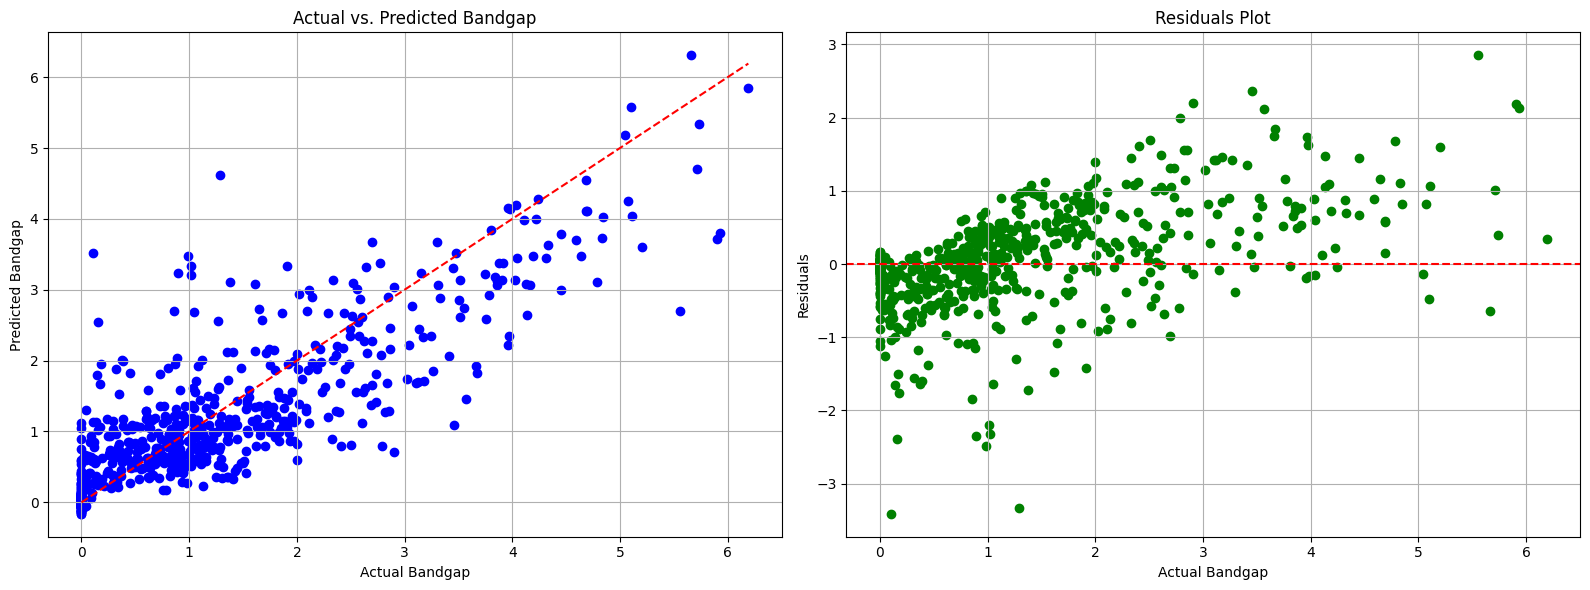

In [6]:
# Flatten the arrays to ensure they are one-dimensional
y_test_flat = y_test.values.flatten()
test_pred_flat = predictions.flatten()

# Calculate residuals (the difference between actual and predicted values)
test_residuals = y_test_flat - test_pred_flat

import matplotlib.pyplot as plt

# Plot predicted vs. actual values
plt.figure(figsize=(16, 6))

# Subplot 1: Actual vs. Predicted Bandgap
plt.subplot(1, 2, 1)
plt.scatter(y_test_flat, test_pred_flat, color='blue')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], linestyle='--', color='red')
plt.title('Actual vs. Predicted Bandgap')
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.grid(True)

# Subplot 2: Residuals Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_flat, test_residuals, color='green')
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residuals Plot')
plt.xlabel('Actual Bandgap')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()


cnn for 9 features

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, BatchNormalization
from sklearn.metrics import r2_score

# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/major_project_endsem/refined_dataset.csv')
dataset = dataset.drop('Formula', axis=1)

# Split dataset into input features (X) and target variable (y)
X = dataset.drop('Bandgap', axis=1)
y = dataset['Bandgap']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input data for CNN (add channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history1 = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test)

# Make predictions
predictions1 = model.predict(X_test)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
r2score = r2_score(y_test, predictions1)
print("R-squared (R2) Score:", r2score)

Epoch 1/100
73/73 [==============================] - 2s 10ms/step - loss: 0.8245 - mae: 0.6401 - mse: 0.8245 - val_loss: 0.0960 - val_mae: 0.2355 - val_mse: 0.0960
Epoch 2/100
73/73 [==============================] - 0s 6ms/step - loss: 0.0469 - mae: 0.1646 - mse: 0.0469 - val_loss: 0.0239 - val_mae: 0.1153 - val_mse: 0.0239
Epoch 3/100
73/73 [==============================] - 0s 6ms/step - loss: 0.0227 - mae: 0.1099 - mse: 0.0227 - val_loss: 0.0163 - val_mae: 0.0931 - val_mse: 0.0163
Epoch 4/100
73/73 [==============================] - 0s 6ms/step - loss: 0.0173 - mae: 0.0908 - mse: 0.0173 - val_loss: 0.0137 - val_mae: 0.0790 - val_mse: 0.0137
Epoch 5/100
73/73 [==============================] - 1s 7ms/step - loss: 0.0170 - mae: 0.0887 - mse: 0.0170 - val_loss: 0.0119 - val_mae: 0.0721 - val_mse: 0.0119
Epoch 6/100
73/73 [==============================] - 1s 7ms/step - loss: 0.0157 - mae: 0.0829 - mse: 0.0157 - val_loss: 0.0146 - val_mae: 0.0836 - val_mse: 0.0146
Epoch 7/100
73/73 [==

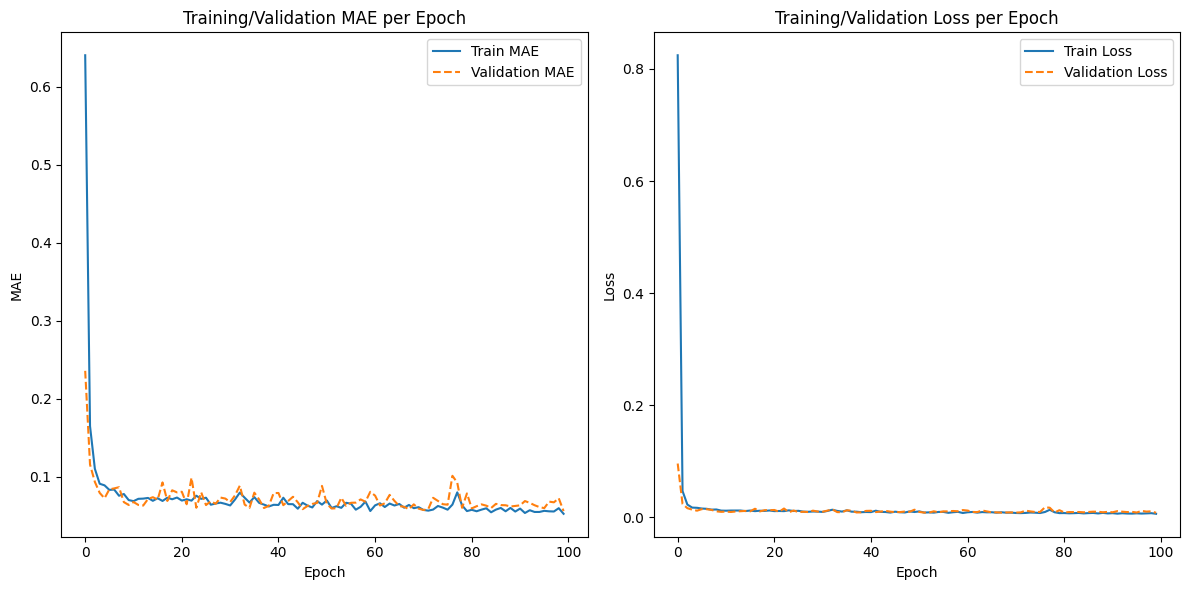

In [9]:
import matplotlib.pyplot as plt

# Create a figure with two subplots arranged horizontally
f, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Training and Validation MAE
axs[0].plot(history1.history['mae'])
axs[0].plot(history1.history['val_mae'], '--')
axs[0].legend(['Train MAE', 'Validation MAE'])
axs[0].set_title('Training/Validation MAE per Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('MAE')

# Plot 2: Training and Validation Loss
axs[1].plot(history1.history['loss'])
axs[1].plot(history1.history['val_loss'], '--')
axs[1].legend(['Train Loss', 'Validation Loss'])
axs[1].set_title('Training/Validation Loss per Epoch')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

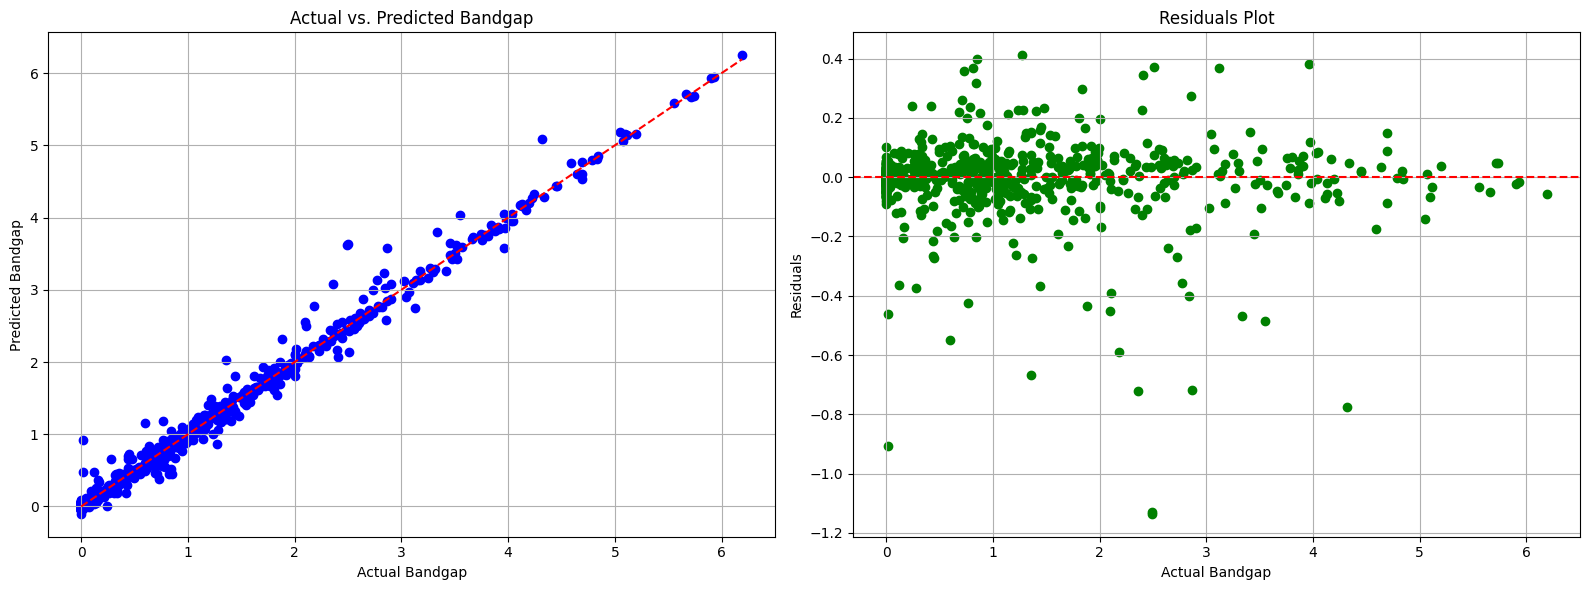

In [11]:
# Flatten the arrays to ensure they are one-dimensional
y_test_flat = y_test.values.flatten()
test_pred_flat = predictions1.flatten()

# Calculate residuals (the difference between actual and predicted values)
test_residuals = y_test_flat - test_pred_flat

import matplotlib.pyplot as plt

# Plot predicted vs. actual values
plt.figure(figsize=(16, 6))

# Subplot 1: Actual vs. Predicted Bandgap
plt.subplot(1, 2, 1)
plt.scatter(y_test_flat, test_pred_flat, color='blue')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], linestyle='--', color='red')
plt.title('Actual vs. Predicted Bandgap')
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.grid(True)

# Subplot 2: Residuals Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_flat, test_residuals, color='green')
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residuals Plot')
plt.xlabel('Actual Bandgap')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()